**Problem Set Logistic Regression**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.model_selection import train_test_split

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Dependent-variable" data-toc-modified-id="Dependent-variable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dependent variable</a></span></li><li><span><a href="#Transform-variables" data-toc-modified-id="Transform-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transform variables</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Logistic-regression-model" data-toc-modified-id="Logistic-regression-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Logistic regression model</a></span><ul class="toc-item"><li><span><a href="#Fit-logistic-regression" data-toc-modified-id="Fit-logistic-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fit logistic regression</a></span></li><li><span><a href="#Update-model" data-toc-modified-id="Update-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Update model</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Confusion-matrix-&amp;-metrics" data-toc-modified-id="Confusion-matrix-&amp;-metrics-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Confusion matrix &amp; metrics</a></span></li><li><span><a href="#Use-train-&amp;-test-dataset-for-modelling-and-evaluation" data-toc-modified-id="Use-train-&amp;-test-dataset-for-modelling-and-evaluation-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Use train &amp; test dataset for modelling and evaluation</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Dependent-variable" data-toc-modified-id="Dependent-variable-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dependent variable</a></span><ul class="toc-item"><li><span><a href="#Fit-logistic-regression" data-toc-modified-id="Fit-logistic-regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fit logistic regression</a></span></li><li><span><a href="#Update-Model" data-toc-modified-id="Update-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Update Model</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Metrics" data-toc-modified-id="Confusion-Matrix-&amp;-Metrics-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Confusion Matrix &amp; Metrics</a></span></li><li><span><a href="#Use-Train-&amp;-Test-for-modelling-and-evaluation" data-toc-modified-id="Use-Train-&amp;-Test-for-modelling-and-evaluation-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Use Train &amp; Test for modelling and evaluation</a></span></li></ul></li></ul></div>

<br/>

<br/>

<br/>

a

a

a





**Logistic Regression** 

**Task Description**

In this assignment, we analyse the relationship between drinking behavior and some predictor variables in the data `responses.csv`. In particular, we want to classify which respondents are likely to be "heavy drinker". 

The data file `responses.csv` contains the data from a questionnaire and consists of 1010 rows (people) and 150 columns (139 integer and 11 categorical). See the data description PDF for a detailed overview of the data.


# Problem set description:

## Import data

Import the data (responses.csv), call the DataFrame `df` and delete all missing values with  `df.dropna(inplace=True)`. Next, get an overview of the categorical variable `Alcohol` with `df.Alcohol.value_counts()`. We only want to keep respondents who `drink a lot` or `never` drink alcohol. Therefore, delete all respondents who are `social drinkers` with `df = df[df.Alcohol != 'social drinker']`. 

## Dependent variable

Create a new categorical variable called `Drinking`, where all respondents who drink a lot are labeled as `Yes` otherwise `No`: `df['Drinking'] = np.where(df['Alcohol']=='drink a lot', 'Yes', 'No')` . Delete the variable `Alcohol`. 
    
## Transform variables  
  
Change the data type of variable `Gender` in a numerical format: in particular, use `df['Gender_2'] = pd.factorize( df['Gender'] )[0]` to create a new variable `Gender_2` with the desired format (so it may be used as predictor in the logistic regression).  


## Data exploration

In a logistic regression, you first need to determine which variables you should include as predictors in your logistic regression model. Remember that your model should classify which of the respondent's is either a heavy drinker or does not drink at all. This means you need to analyze the relationship between the response (`Drinking`) and possible predictor variables, which could explain someones drinking behavior. 

> a) Interpret the visualizations and explain, whether you would include the variable in your model or not.


Hints: 

- Always look out for variables where you can identify a difference between responses from heavy drinker and non drinker. Use visualisations to analyze the relationship between the variables. Choose at least 4 predictor variables for your model.

- In the data, you mainly have to deal with discrete categorical values (i.e. Likert-scale responses). In seaborn, there are several different ways to visualize a relationship between variables involving categorical data. Review [seaborn's documentation about plotting categorical data](https://seaborn.pydata.org/tutorial/categorical.html).


 - Here are some examples:

  - `sns.catplot(x="Drinking", y="Darkness", kind="box", data=df);`

  - `sns.catplot(x="Gender", y="Age", hue="Drinking", kind="box", data=df);`

  - `sns.catplot(x="Gender", y="Cheating in school", hue="Drinking", kind="violin", data=df);`

    
    
## Logistic regression model


### Fit logistic regression

Next, we fit a logistic regression model with some predictor variables of our choice (response: `Drinking`).

> b) Explain, which of the predictors you would keep and which you would exclude from the model. What is your criterion for the exclusion of predictors?


### Update model 

> c) Take a look at our new logistic regression model and explain whether you would recommend to exclude a predictor variable from the model.


### Prediction

We use the updated model and predict the probability that a respondent drinks a lot. We classify a respondent as drinker (with label '`Yes`') if the predicted probability exceeds:

    - c1): 0.4 (i.e. threshold = 0.4) 
    - c2): 0.5 (i.e. threshold = 0.5)
    - c3): 0.7 (i.e. threshold = 0.7). 
    
Otherwise we classify the respondent as non-drinker (with label '`No`').


### Confusion matrix & metrics

We compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Next, we determine the following metrics: 

- "Accuracy", 
- Precision" (what proportion of positive identifications was actually correct?), "
- Recall" (what proportion of actual positives was identified correctly) and the 
- F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). 

> d) Interpret the findings. Which threshold would you recommend? Explain your answer.

Hints: 

- **Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. 
- **Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives. 
- These two quantities are related to the **F1 score**, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$


### Use train & test dataset for modelling and evaluation

We fit the logistic regression model using a training data set. We then compute the confusion matrix and accuracy for the held out data (test data size = 30%; threshold = 0.7).

> e) Interpret the results.


# Data preparation:

## Import data

In [2]:
# Load the csv data files into pandas dataframes
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/responses.csv")
df.dropna(inplace=True)

## Dependent variable

In [3]:
df.Alcohol.value_counts()

social drinker    448
drink a lot       153
never              73
Name: Alcohol, dtype: int64

In [4]:
# delete social drinker
df = df[df.Alcohol != 'social drinker']

In [5]:
# check
df.Alcohol.value_counts()

drink a lot    153
never           73
Name: Alcohol, dtype: int64

In [6]:
# create dependent variable
df['Drinking'] = np.where(df['Alcohol']=='drink a lot', 'Yes', 'No')

In [7]:
# check
df.Drinking.value_counts()

Yes    153
No      73
Name: Drinking, dtype: int64

In [8]:
df = df.drop('Alcohol', axis=1)

In [9]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 1005
Columns: 150 entries, Music to Drinking
dtypes: float64(134), int64(5), object(11)
memory usage: 266.6+ KB


In [10]:
# Change data types
df['Gender_2'] = pd.factorize( df['Gender'] )[0]

In [11]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Drinking,Gender_2
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,Yes,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,Yes,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,67.0,2.0,female,right handed,secondary school,no,city,block of flats,Yes,0
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,77.0,1.0,male,right handed,secondary school,no,city,block of flats,No,1
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow,Yes,1


# Data exploration

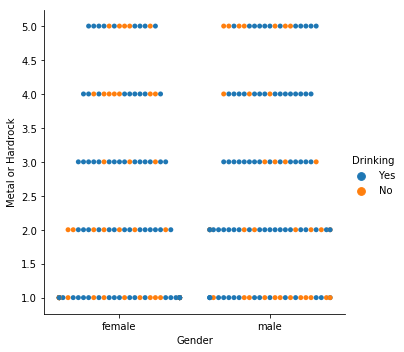

In [12]:
sns.catplot(x="Gender", y="Metal or Hardrock", hue="Drinking", kind="swarm", data=df);

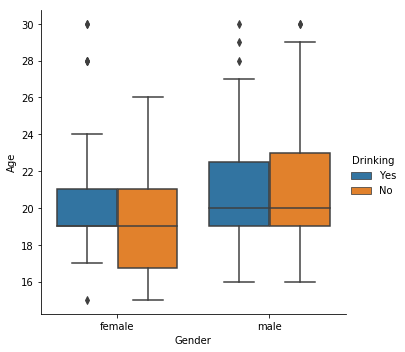

In [13]:
sns.catplot(x="Gender", y="Age", hue="Drinking", kind="box", data=df);

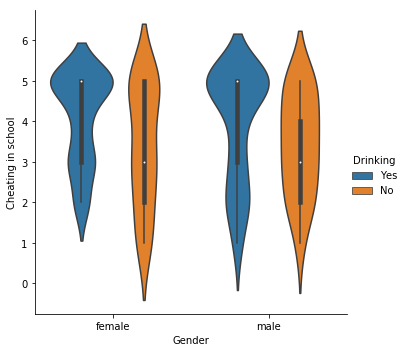

In [14]:
sns.catplot(x="Gender", y="Cheating in school", hue="Drinking", kind="violin", data=df);

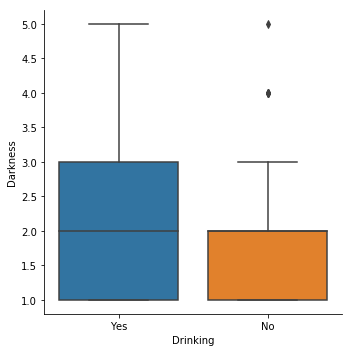

In [15]:
sns.catplot(x="Drinking", y="Darkness", kind="box", data=df);

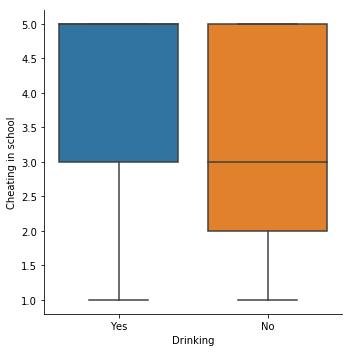

In [16]:
sns.catplot(x="Drinking", y="Cheating in school", kind="box", data=df);

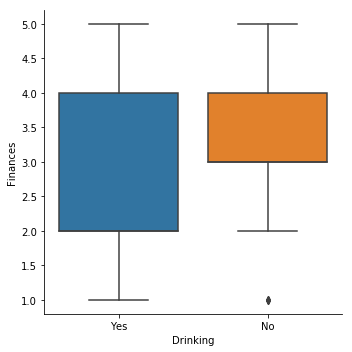

In [17]:
sns.catplot(x="Drinking", y="Finances", kind="box", data=df);

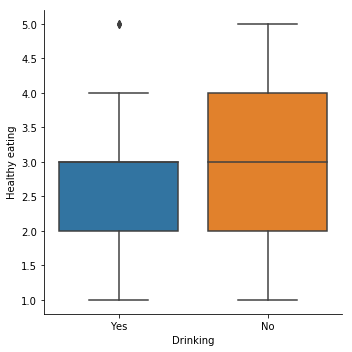

In [18]:
sns.catplot(x="Drinking", y="Healthy eating", kind="box", data=df);

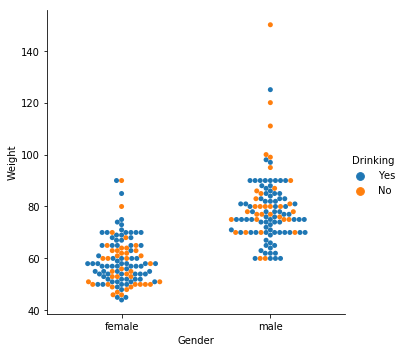

In [19]:
sns.catplot(x="Gender", y="Weight", hue="Drinking", kind="swarm", data=df);


# Logistic regression model

### Fit logistic regression

In [20]:
X = df[['Cheating in school', 'Darkness', 'Finances', 'Healthy eating', 'Gender_2']].copy()
# Statsmodel needs a constant added manually
X['Intercept'] = 1
X.head()

,Cheating in school,Darkness,Finances,Healthy eating,Gender_2,Intercept
0,2.0,1.0,3.0,4.0,0,1
1,4.0,1.0,3.0,3.0,0,1
2,3.0,1.0,2.0,3.0,0,1
5,4.0,2.0,2.0,2.0,1,1
7,5.0,4.0,3.0,2.0,1,1


In [21]:
y = pd.get_dummies(df['Drinking'])
y = y['Yes'].astype('float')
y.head(4)

0    1.0
1    1.0
2    1.0
5    0.0
Name: Yes, dtype: float64

In [22]:
# Define and fit logistic regression model
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.563650
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  226
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            5
Date:                Fri, 07 Jun 2019   Pseudo R-squ.:                  0.1041
Time:                        19:52:52   Log-Likelihood:                -127.38
converged:                       True   LL-Null:                       -142.18
                                        LLR p-value:                 1.775e-05
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cheating in school     0.2339      0.116      2.016      0.044       0.006       0.461
Darkness               0.3293      0.152      2.160      0.031       0.030       0.628
Finances              -0.4760      0.132     -3.611      0.000      -0.734      -0.218
Healthy eating        -0.0329      0.156     -0.211      0.833      -0.338       0.273
Gender_2               0.3386      0.325      1.041      0.298      -0.299       0.976
Intercept              0.5485      0.891      0.615      0.538      -1.198       2.295
======================================================================================
"""

### Update Model

In [23]:
# Define and fit logistic regression model
X = X.drop(X[['Healthy eating','Gender_2']], axis=1)
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.566348
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  226
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Jun 2019   Pseudo R-squ.:                 0.09977
Time:                        19:52:52   Log-Likelihood:                -127.99
converged:                       True   LL-Null:                       -142.18
                                        LLR p-value:                 3.035e-06
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cheating in school     0.2326      0.114      2.035      0.042       0.009       0.457
Darkness               0.2842      0.145      1.955      0.051      -0.001       0.569
Finances              -0.4939      0.130     -3.794      0.000      -0.749      -0.239
Intercept              0.7669      0.651      1.178      0.239      -0.509       2.043
======================================================================================
"""

### Prediction

In [24]:
# Predict and join probabilty to original dataframe
df['Probability'] = logit.predict(X)
df.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Drinking,Gender_2,Probability
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,female,right handed,college/bachelor degree,no,village,block of flats,Yes,0,0.508648
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,female,right handed,college/bachelor degree,no,city,block of flats,Yes,0,0.622393
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,female,right handed,secondary school,no,city,block of flats,Yes,0,0.681581
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,1.0,male,right handed,secondary school,no,city,block of flats,No,1,0.782080
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow,Yes,1,0.829903


In [25]:
# Use thresholds to discretize Probability
df['Threshold 0.4'] = np.where(df['Probability'] > 0.4, 'Yes', 'No')
df['Threshold 0.5'] = np.where(df['Probability'] > 0.5, 'Yes', 'No')
df['Threshold 0.6'] = np.where(df['Probability'] > 0.6, 'Yes', 'No')
df['Threshold 0.7'] = np.where(df['Probability'] > 0.7, 'Yes', 'No')
df.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Only child,Village - town,House - block of flats,Drinking,Gender_2,Probability,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,no,village,block of flats,Yes,0,0.508648,Yes,Yes,No,No
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,no,city,block of flats,Yes,0,0.622393,Yes,Yes,Yes,No
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,no,city,block of flats,Yes,0,0.681581,Yes,Yes,Yes,No
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,no,city,block of flats,No,1,0.782080,Yes,Yes,Yes,Yes
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,no,city,house/bungalow,Yes,1,0.829903,Yes,Yes,Yes,Yes


### Confusion Matrix & Metrics

In [26]:
# write a function to calculate confusion matrix for different thresholds
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['Drinking'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes']['Yes']
    tn = df_conf['No']['No']
    fp = df_conf['Yes']['No']
    fn = df_conf['No']['Yes']
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [27]:
print_metrics(df, 'Threshold 0.4')
print_metrics(df, 'Threshold 0.5')
print_metrics(df, 'Threshold 0.6')
print_metrics(df, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.4



Predicted,No,Yes
Actual,,
No,11,62
Yes,8,145


Accuracy:  0.6903
Precision: 0.7005
Recall:    0.9477
F1 Score:  0.8056 

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,17,56
Yes,14,139


Accuracy:  0.6903
Precision: 0.7128
Recall:    0.9085
F1 Score:  0.7989 

--------------------------------------------------
Metrics for: Threshold 0.6



Predicted,No,Yes
Actual,,
No,37,36
Yes,32,121


Accuracy:  0.6991
Precision: 0.7707
Recall:    0.7908
F1 Score:  0.7806 

--------------------------------------------------
Metrics for: Threshold 0.7



Predicted,No,Yes
Actual,,
No,53,20
Yes,63,90


Accuracy:  0.6327
Precision: 0.8182
Recall:    0.5882
F1 Score:  0.6844 



Usually we would not compute the confusion matrix and the metrics by ourself. Instead, we can use sklearn's modules. 
Review the documentation of sklearn's [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)

In [28]:
from sklearn.metrics import confusion_matrix
# We take threshold 0.4 as an example

y_true = pd.Series(df['Drinking'])
y_pred = pd.Series(df['Threshold 0.7'])

confusion_matrix(y_true, y_pred)

array([[53, 20],
       [63, 90]])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.6327433628318584

In [30]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_true, y_pred)

(array([0.45689655, 0.81818182]),
 array([0.7260274 , 0.58823529]),
 array([0.56084656, 0.68441065]),
 array([ 73, 153]))

### Use Train & Test for modelling and evaluation

In [31]:
# Split Dataset
train_X, test_X, train_y, test_y = train_test_split(X.copy(), y.copy(), test_size=0.3)
print(f'Trainingset size: {len(train_X)}')
print(f'Testingset size: {len(test_X)}')

Trainingset size: 158
Testingset size: 68


In [32]:
# Train logistic regression model with training set
logit = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.580221
         Iterations 5


In [33]:
# Predict test data
test_X['Probability'] = logit.predict(test_X)

In [34]:
# Calculate metrics
test_X['Drinking'] = np.where(test_y == 1.0, 'Yes', 'No')  # Join actual values
test_X['Threshold 0.5'] = np.where(test_X['Probability'] > 0.5, 'Yes', 'No')  # Calc categories by threshold
test_X.head(7)

,Cheating in school,Darkness,Finances,Intercept,Probability,Drinking,Threshold 0.5
295,5.0,3.0,3.0,1,0.786340,Yes,Yes
132,5.0,2.0,5.0,1,0.576524,No,Yes
96,2.0,1.0,1.0,1,0.686032,Yes,Yes
230,5.0,3.0,3.0,1,0.786340,Yes,Yes
761,5.0,1.0,1.0,1,0.787215,Yes,Yes
716,2.0,2.0,5.0,1,0.445699,Yes,No
816,1.0,3.0,2.0,1,0.717735,Yes,Yes


In [35]:
print_metrics(test_X, 'Threshold 0.5')

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,6,18
Yes,3,41


Accuracy:  0.6912
Precision: 0.6949
Recall:    0.9318
F1 Score:  0.7961 

